学习一些有用的图。

In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 一元数据图形

## 茎叶图

In [2]:
x <- c(11, 15, 16, 11, 18, 28, 22)

stem(x, scale = 1)


  The decimal point is 1 digit(s) to the right of the |

  1 | 11
  1 | 568
  2 | 2
  2 | 8



In [3]:
x <- c(43, 46, 47, 52, 53, 58)
stem(x)


  The decimal point is 1 digit(s) to the right of the |

  4 | 3
  4 | 67
  5 | 23
  5 | 8



In [4]:
data(cd4, package="boot")

In [5]:
str(cd4) 

'data.frame':	20 obs. of  2 variables:
 $ baseline: num  2.12 4.35 3.39 2.51 4.04 5.1 3.77 3.35 4.1 3.35 ...
 $ oneyear : num  2.47 4.61 5.26 3.02 6.36 5.93 3.93 4.09 4.88 3.81 ...


In [6]:
library(modelsummary)
datasummary_skim(cd4)


+----------+--------+--------------+------+-----+-----+--------+-----+---------------------------------------------------------------+
|          | Unique | Missing Pct. | Mean | SD  | Min | Median | Max | Histogram                                                     |
+==========+========+==============+======+=====+=====+========+=====+===============================================================+
| baseline | 18     | 0            | 3.3  | 0.8 | 1.9 | 3.4    | 5.1 | ![](tinytable_assets/idi534ys8bdapx6e3lhpxa.png){ height=16 } |
+----------+--------+--------------+------+-----+-----+--------+-----+---------------------------------------------------------------+
| oneyear  | 20     | 0            | 4.1  | 1.2 | 2.4 | 4.2    | 6.4 | ![](tinytable_assets/idkdpkv71wlr283k9um1rg.png){ height=16 } |
+----------+--------+--------------+------+-----+-----+--------+-----+---------------------------------------------------------------+ 

In [7]:
library(skimr)
skim(cd4) %>% print()

-- Data Summary ------------------------
                           Values
Name                       cd4   
Number of rows             20    
Number of columns          2     
_______________________          
Column type frequency:           
  numeric                  2     
________________________         
Group variables            None  

-- Variable type: numeric ------------------------------------------------------
  skim_variable n_missing complete_rate mean    sd   p0  p25  p50  p75 p100
1 baseline              0             1 3.29 0.811 1.88 2.64 3.35 3.84 5.1 
2 oneyear               0             1 4.09 1.16  2.4  3.18 4.16 4.78 6.36
  hist                            
1 "\u2585\u2587\u2587\u2585\u2581"
2 "\u2587\u2585\u2587\u2583\u2582"


In [8]:
stem(cd4$baseline)


  The decimal point is at the |

  1 | 9
  2 | 15567
  3 | 000444468
  4 | 0124
  5 | 1



In [9]:
stem(cd4$oneyear)


  The decimal point is at the |

  2 | 4568
  3 | 02389
  4 | 1234679
  5 | 369
  6 | 4



## 并排茎叶图

In [10]:
aplpack::stem.leaf.backback(cd4$baseline, cd4$oneyear)

________________________________
  1 | 2: represents 1.2, leaf unit: 0.1 
    cd4$baseline      cd4$oneyear
________________________________
             | 1* |             
   1        8| 1. |             
   3       41| 2* |44       2   
   7     9655| 2. |58       4   
  (6)  333300| 3* |022      7   
   7       75| 3. |89       9   
   5     3110| 4* |0233    (4)  
             | 4. |678      7   
   1        1| 5* |2        4   
             | 5. |59       3   
             | 6* |3        1   
             | 6. |             
             | 7* |             
________________________________
n:         20      20       
________________________________


## 盒形图

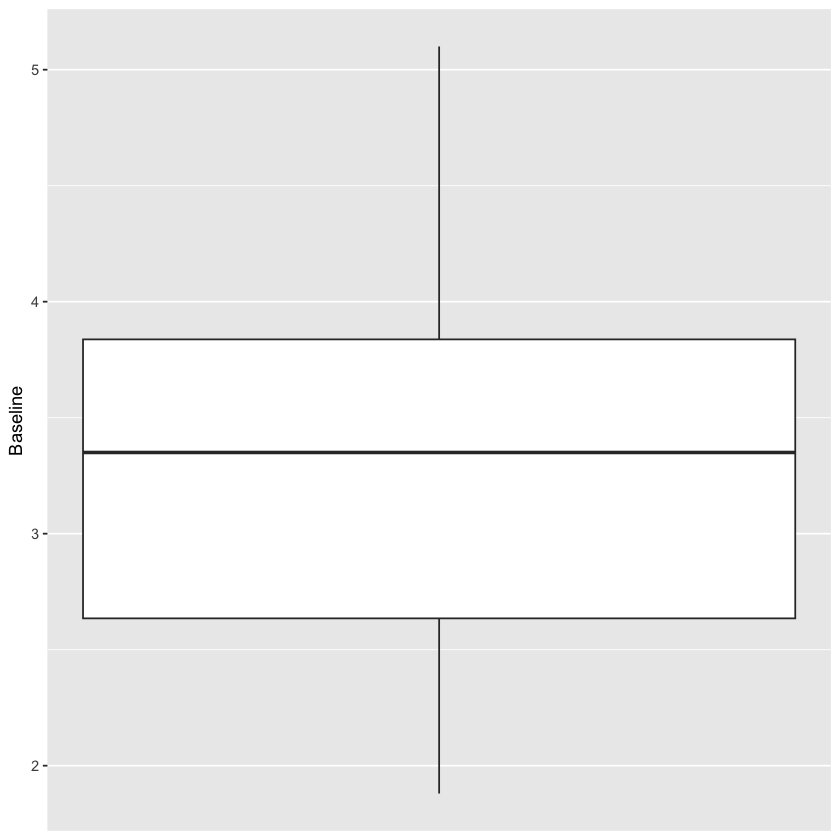

In [11]:
library(ggplot2)
p <- ggplot(data = cd4, mapping = aes(
  y = baseline))
p + geom_boxplot() + 
  scale_x_continuous(breaks = NULL) +
  labs(x = NULL, y = "Baseline")

## 直方图

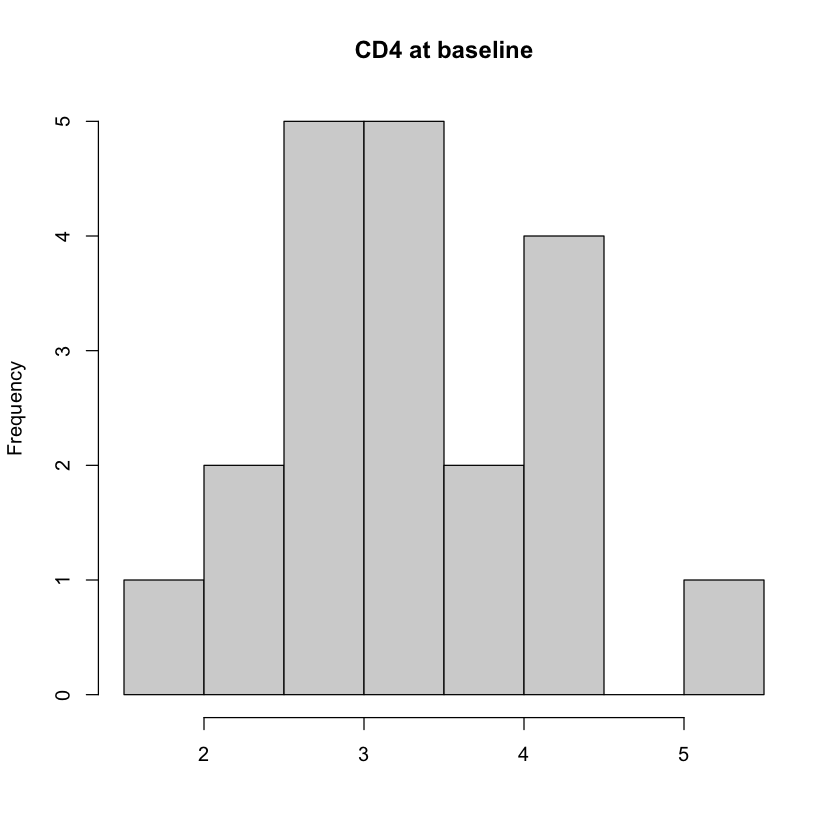

In [6]:
par(bg = "white")
hist(cd4[["baseline"]], 
  main = "CD4 at baseline", xlab = "")

## 核密度图

In [7]:
ggplot(bankNotes |> slice(101:200), aes(
    x = diag )) +
  geom_density() + 
  labs(x = "假钞对角线长度")

ERROR: Error: object 'bankNotes' not found


# 二元变量图形

## 散点图

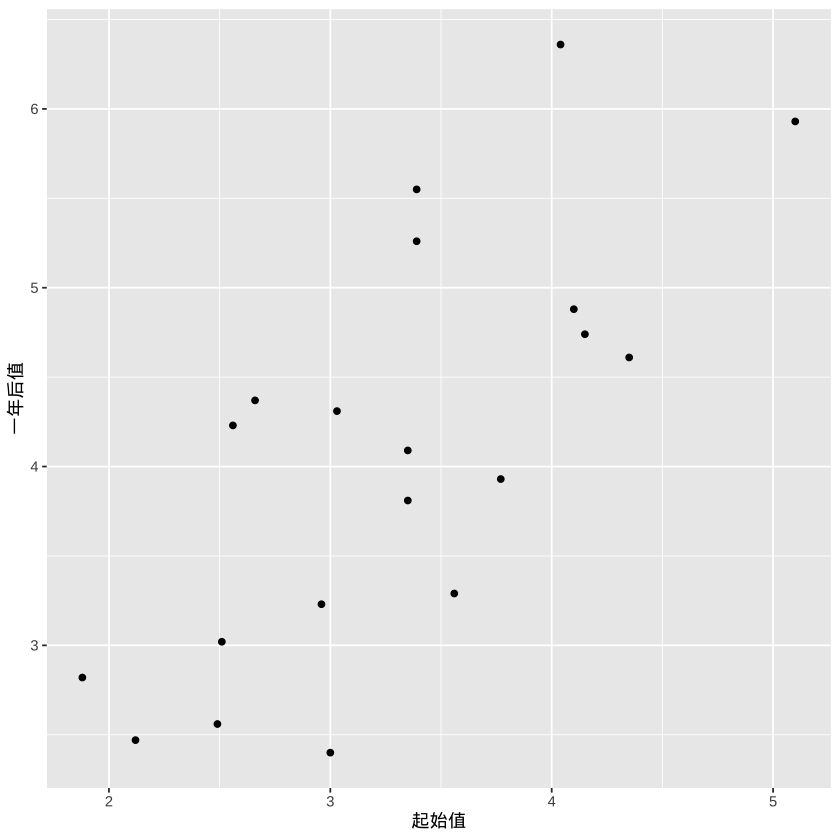

In [30]:
library(sysfonts)
library(showtextdb)
library(showtext)
showtext_auto()

ggplot(cd4, aes(
  x = baseline, y = oneyear)) +
  geom_point() +
  labs(x = "起始值", y = "一年后值")

## 散点图的曲线拟合

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


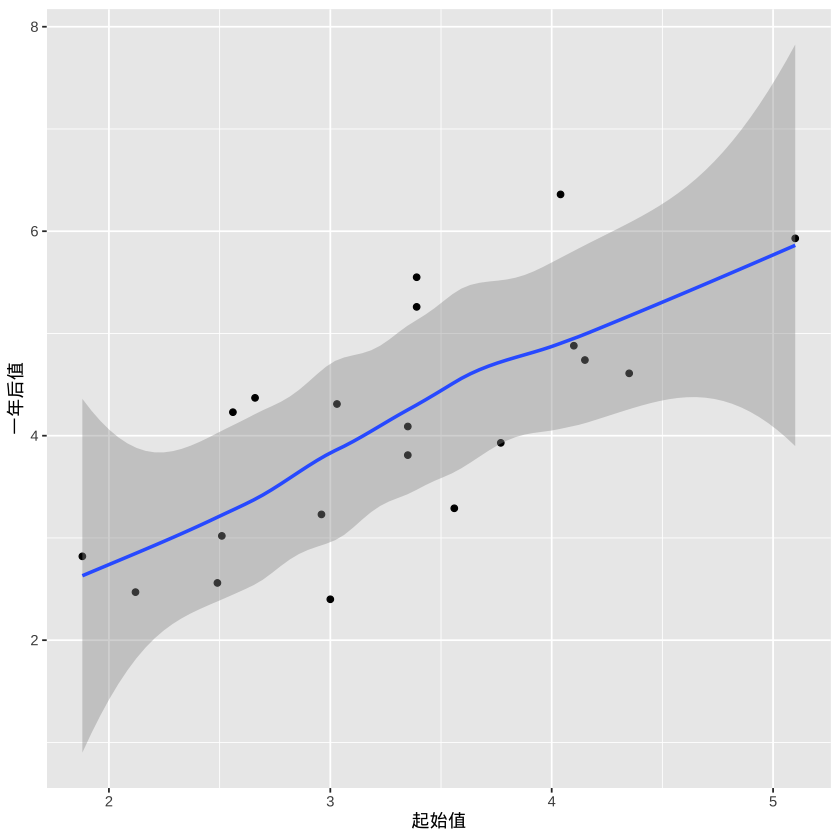

In [31]:
ggplot(cd4, aes(
  x = baseline, y = oneyear)) +
  geom_point() +
  geom_smooth() + 
  labs(x = "起始值", y = "一年后值")

## 二元盒形图

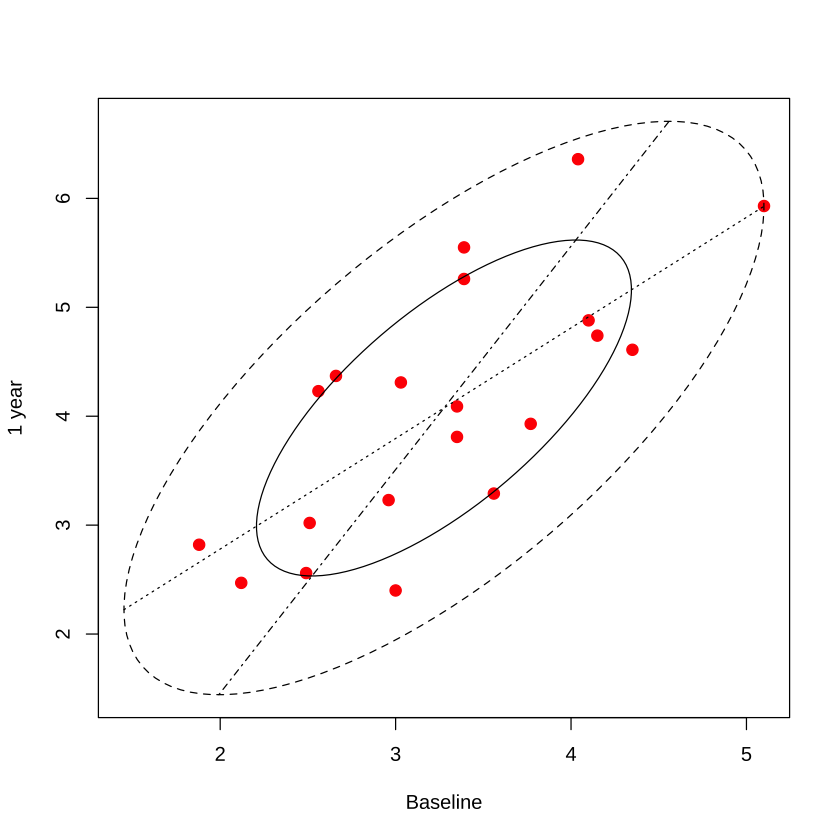

In [34]:
library(MVA)
par(bg = "white")
bvbox(cd4,
  xlab="Baseline",
  ylab="1 year",
  pch=19, cex=1.25, col="red")

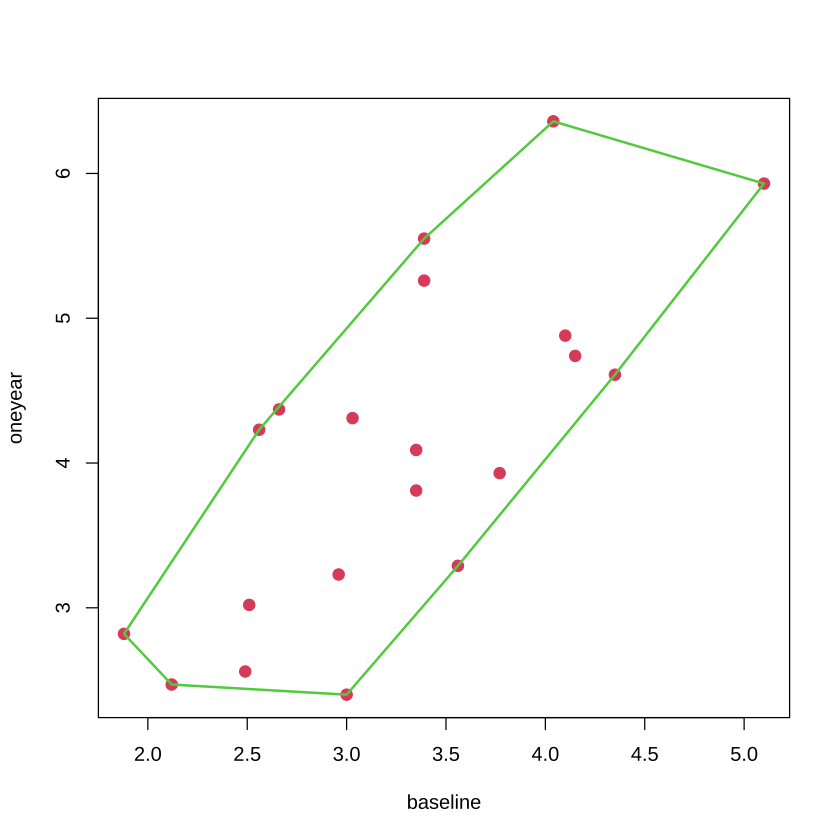

In [36]:
ch <- with(cd4, chull(baseline, oneyear)) # 凸壳的支撑点下标
ch <- c(ch, ch[1]) # 首尾相连

par(bg = "white")
with(cd4,
  plot(baseline, oneyear,
    pch=19, col=2, cex=1.25))
with(cd4,
  lines(baseline[ch], oneyear[ch],
    col=3, lwd=2))

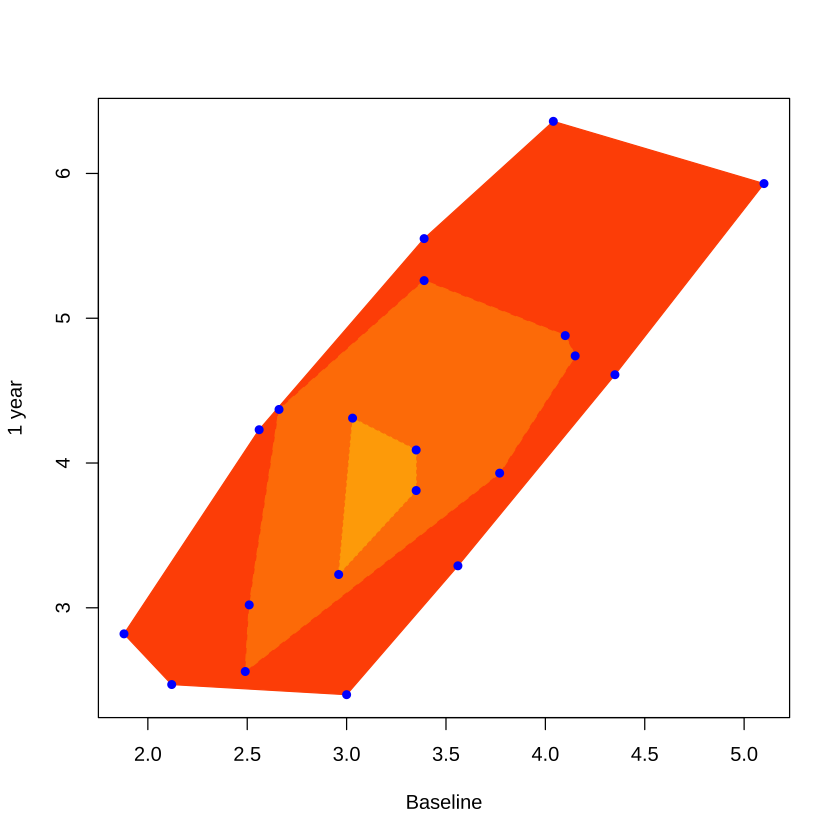

In [38]:
library(aplpack)

nlev <- 3
cols <- heat.colors(9)[3:(nlev+2)]

par(bg = "white")
fig1 <- plothulls(
  cd4,
  n.hull=nlev,
  col.hull=cols,
  xlab="Baseline",
  ylab="1 year",
  lty.hull=1:nlev, density=NA,
  col=0, main="")
with(cd4, points(
  baseline, oneyear,
  pch=16, cex=1, col="blue"))

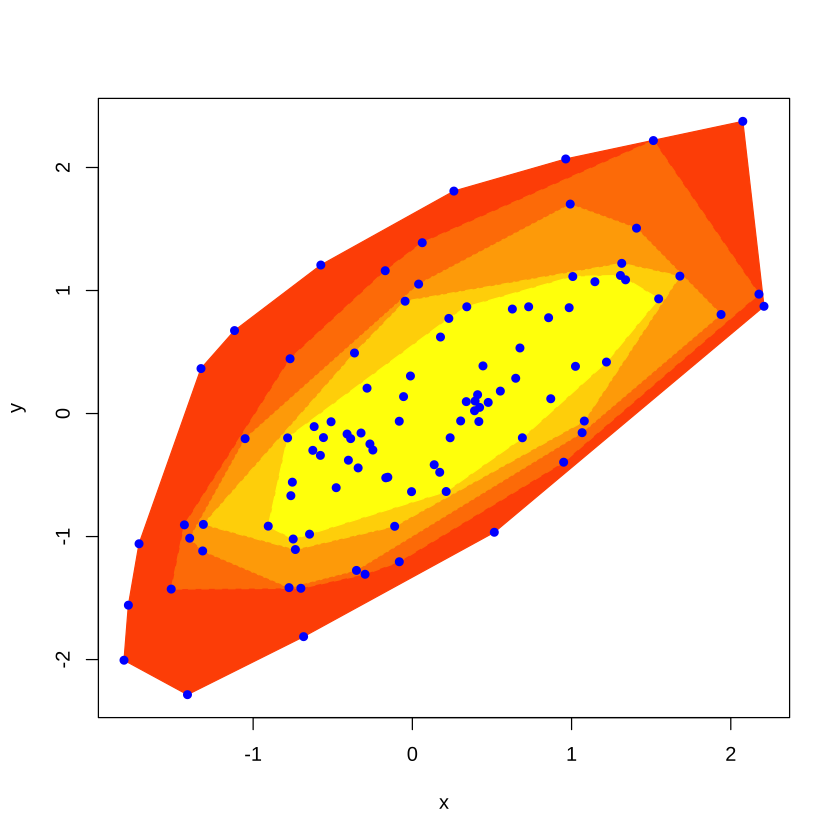

In [40]:
library(aplpack)
library(mvtnorm)

set.seed(1)
da <- rmvnorm(
  100, mean=c(0,0),
  sigma=rbind(c(1,0.7), c(0.7,1)))

nlev <- 5
cols <- heat.colors(9)[3:(nlev+2)]

par(bg = "white")
fig1 <- plothulls(
  da,
  n.hull=nlev,
  col.hull=cols,
  xlab="x",
  ylab="y",
  lty.hull=1:nlev, density=NA,
  col=0, main="")
points(da,
  pch=16, cex=1, col="blue")

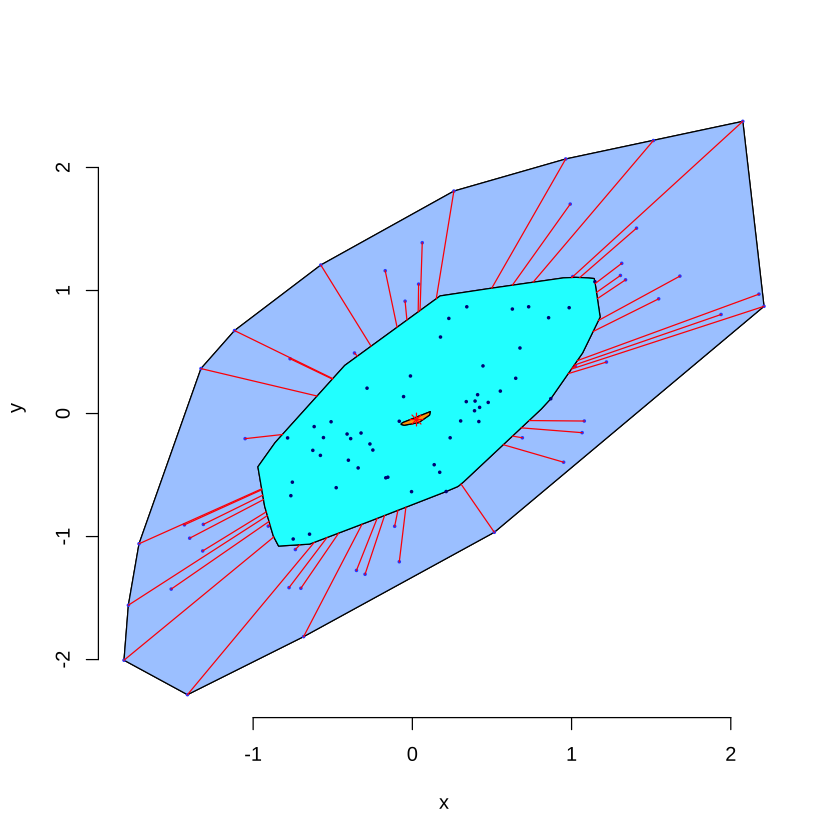

In [42]:
library(aplpack)
library(mvtnorm)

set.seed(1)
da <- rmvnorm(100, mean=c(0,0),
              sigma=rbind(c(1,0.7), c(0.7,1)))

par(bg = "white")
bagplot(da, col.baghull="cyan")

## 二元联合密度图

In [43]:
ggplot(bankNotes, aes(
  x = top, y = diag )) +
  geom_point(alpha = 0.5, color = "green4") + 
  stat_density_2d(color = "black")

ERROR: Error: object 'bankNotes' not found


## 蜂窝图

## $\chi$图

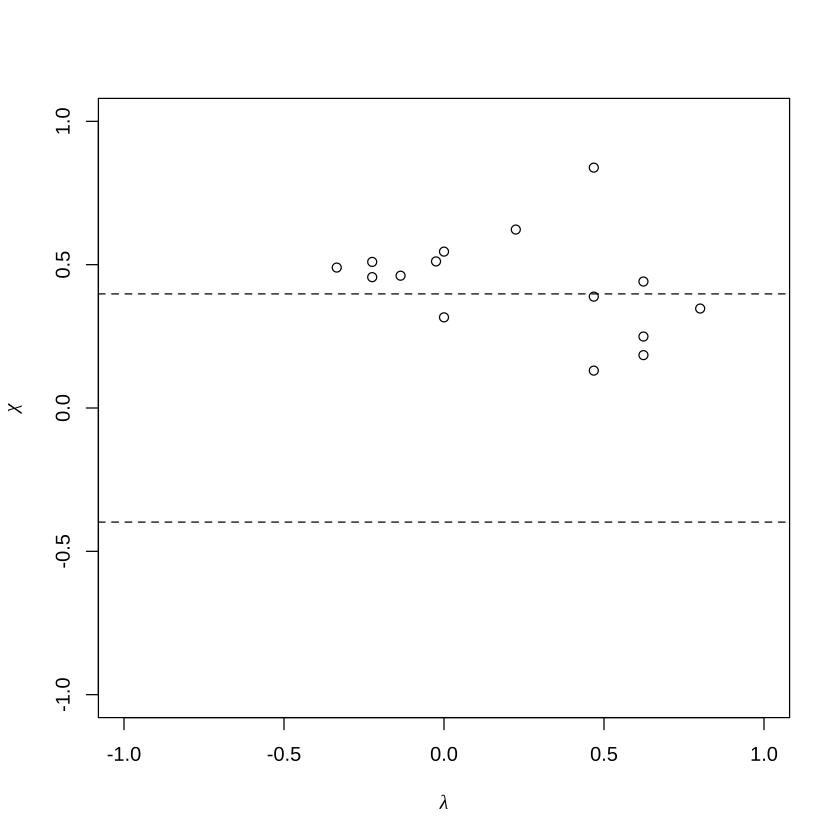

In [45]:
par(bg = "white")
with(cd4, chiplot(
  baseline, oneyear))

# 三元变量的图形

## 三维散点图

In [1]:
library(rgl)
plot3d(iris[,1:3], 
  col=rainbow(9)[4:6][as.numeric(factor(iris[["Species"]]))], 
  size=10)

## 气泡图

## 拟合曲面

# 多元变量的图形

## 散点图矩阵

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



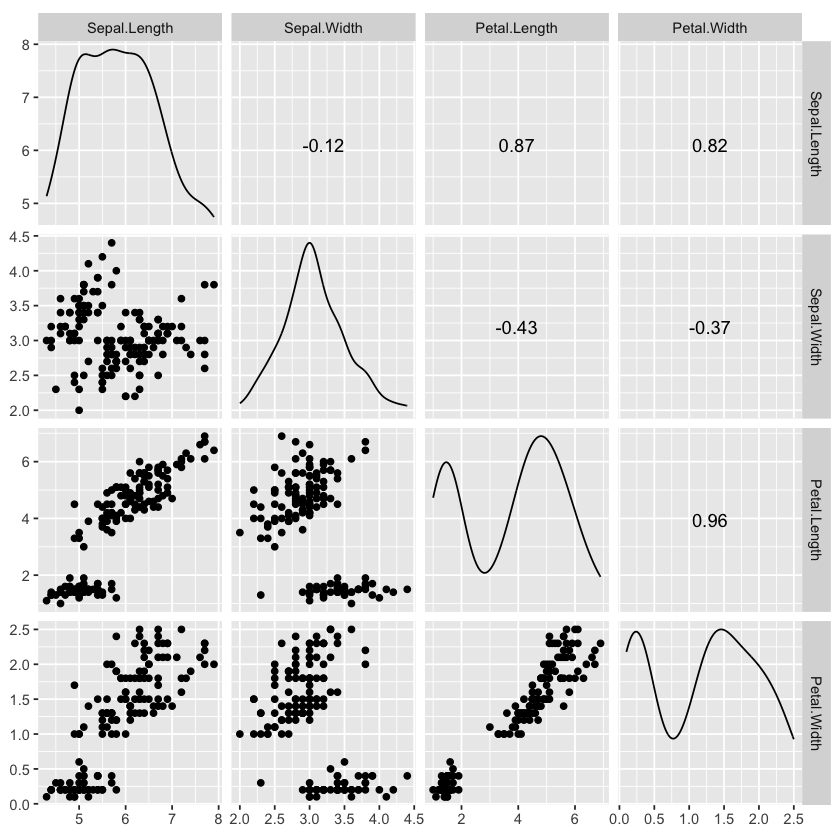

In [2]:
library(GGally)
ggscatmat(data = iris, columns = 1:4)

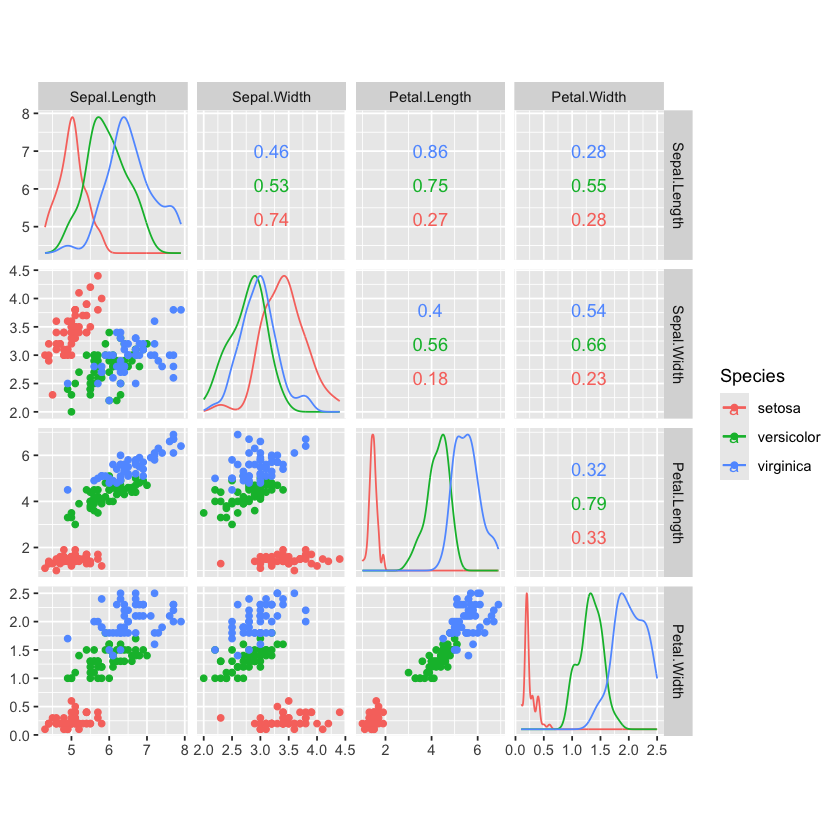

In [3]:
ggscatmat(
  data = iris, columns = 1:4,
  color = "Species")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


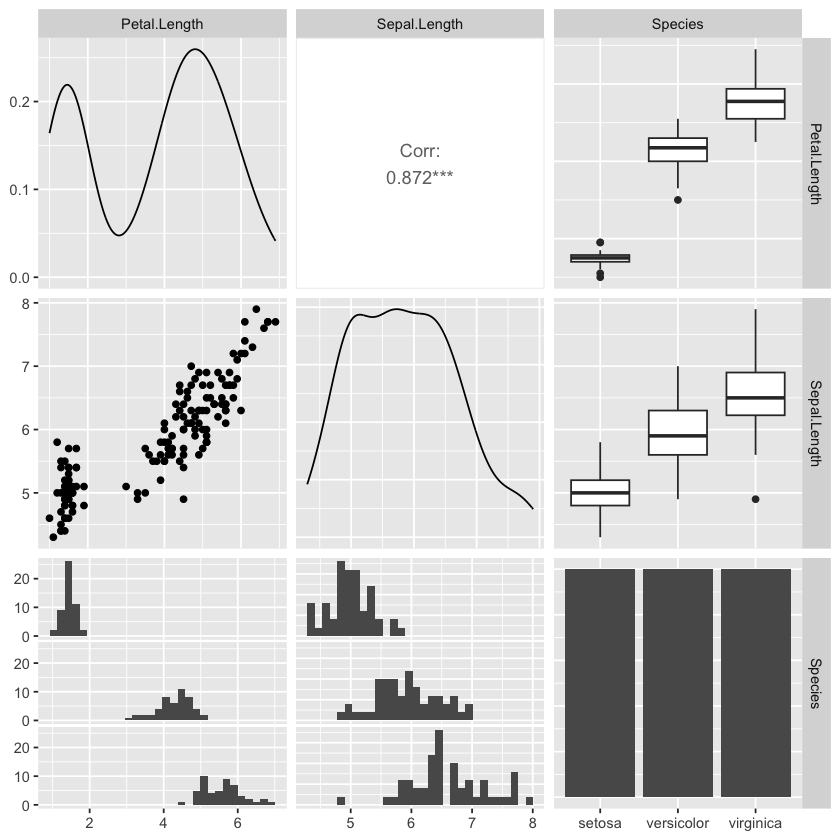

In [4]:
ggpairs(
  data = iris, 
  columns = c(
    "Petal.Length", "Sepal.Length", "Species"))

## 成对散点图与口袋图

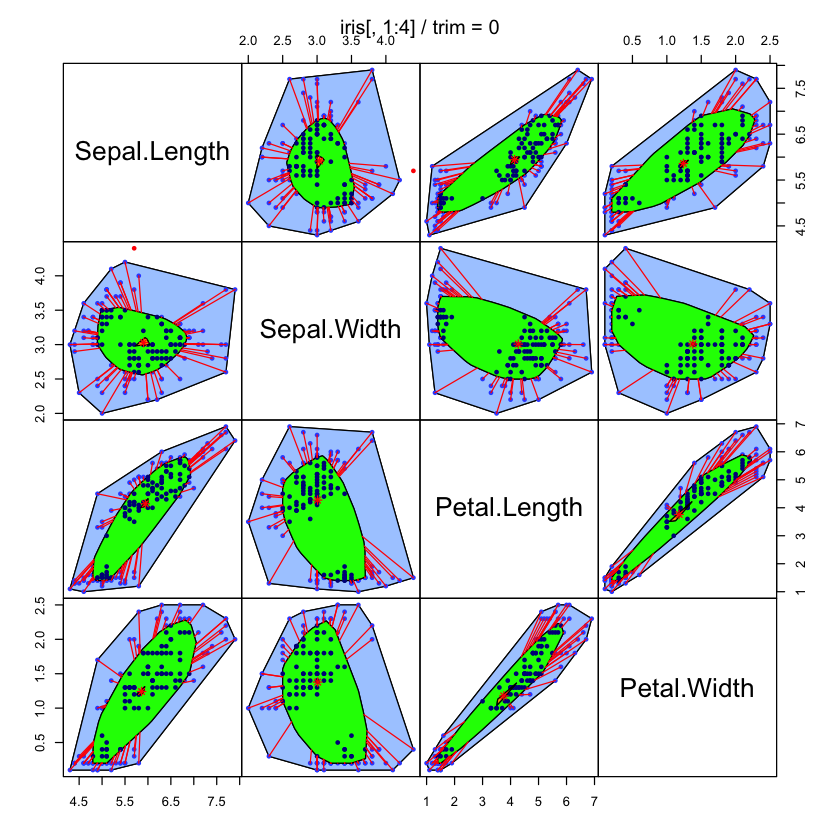

In [6]:
library(aplpack)
par(bg = "white")
invisible(bagplot.pairs(iris[,1:4],
  gap=0, col.baghull="green"))

## 相关系数图

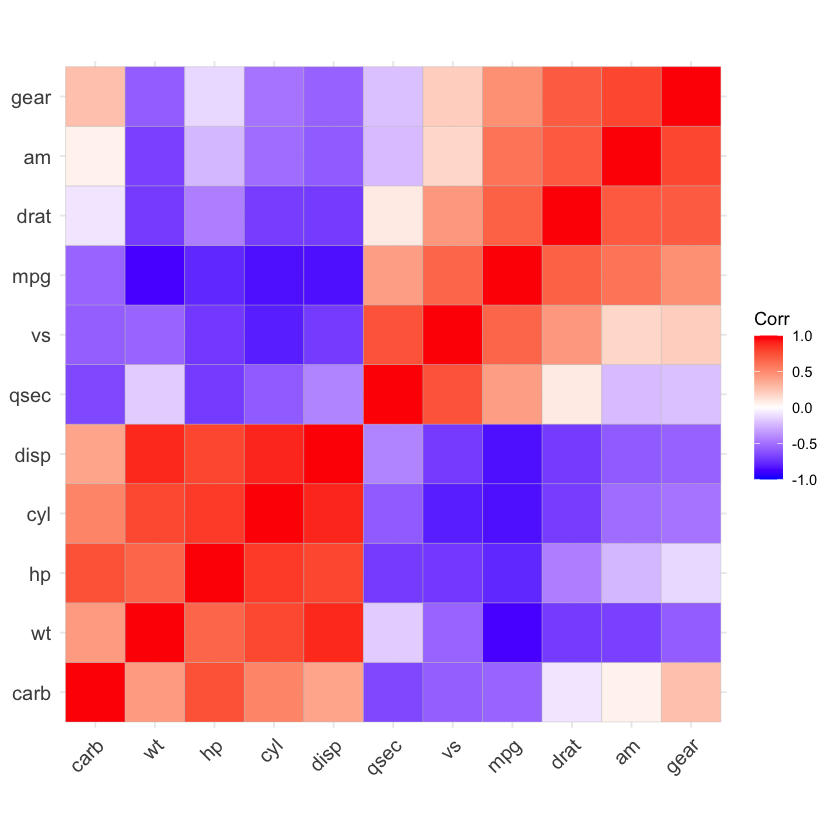

In [8]:
library(ggcorrplot)

data(mtcars)
ggcorrplot(cor(mtcars),
  hc.order=TRUE)

## 协同图

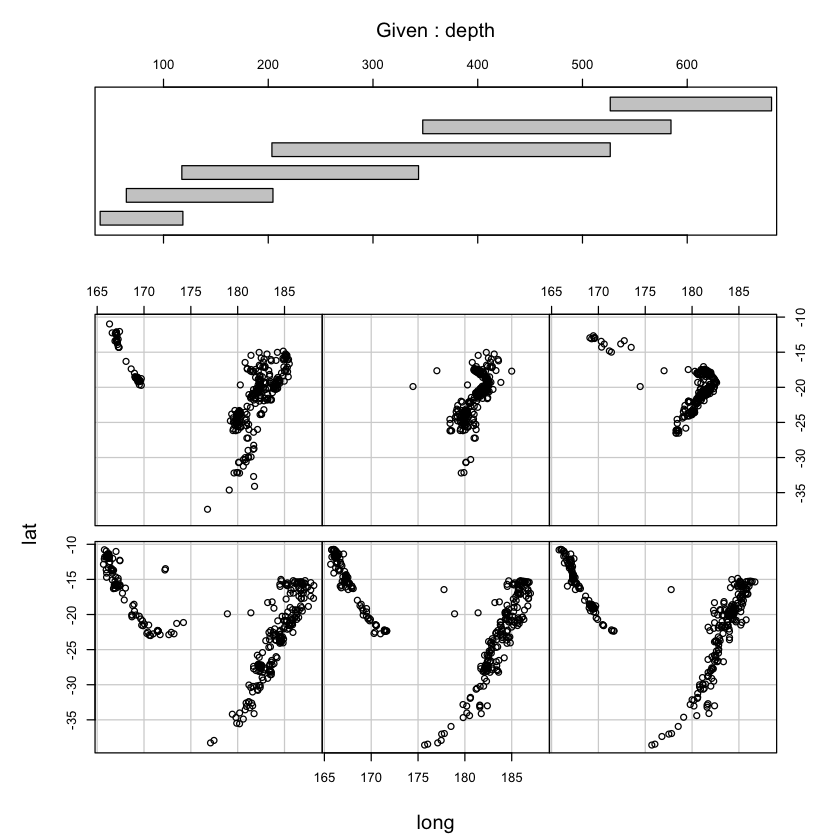

In [10]:
par(bg = "white")
coplot(lat ~ long | depth, data = quakes)

## 星图与雷达图

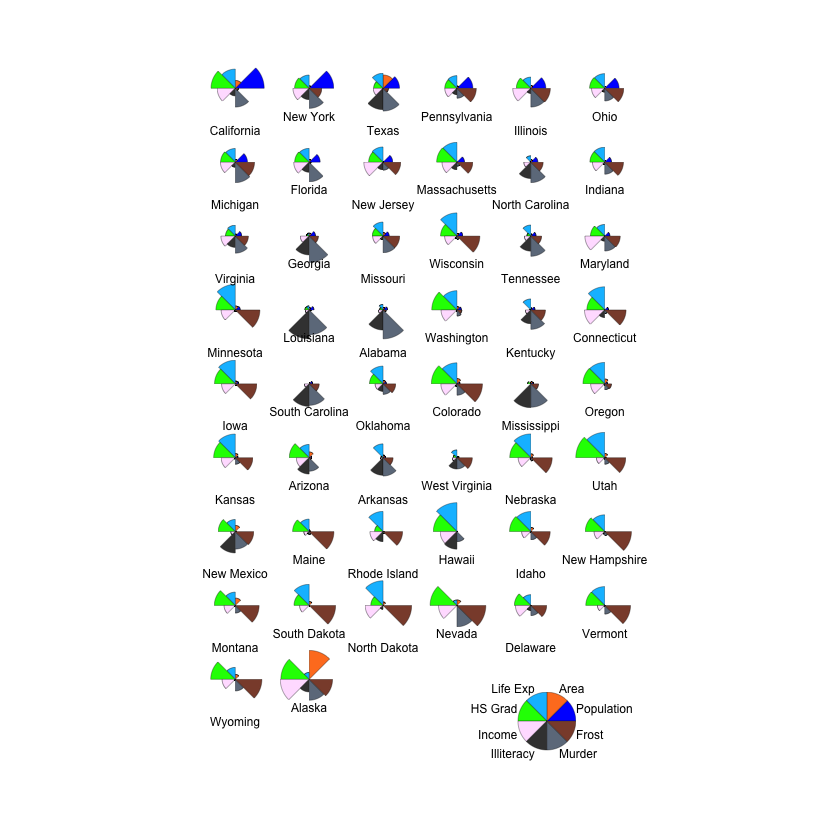

In [23]:
cols <- c("blue1", "chocolate1", "deepskyblue",
          "green", "thistle1", 
          "grey25", "lightsteelblue4", "salmon4")

vars <- c("Population", "Area",
          "Life Exp", "HS Grad", "Income",
          "Illiteracy", "Murder", "Frost")

# 将 state.x77 转换为数据框，便于列名索引
df <- as.data.frame(state.x77)

# 按人口降序排列，并提取指定变量
d <- df[order(-df[["Population"]]), vars]

# 绘制星图
par(bg = "white")
graphics::stars(d, draw.segments = TRUE,
      nrow = 9, ncol = 6,
      ylim = c(-1, 21),
      len = 0.9,  # 注意这里是 len，不是 lenardar
      cex = 0.6,
      col.segments = cols,
      key.loc = c(12, 1)
)


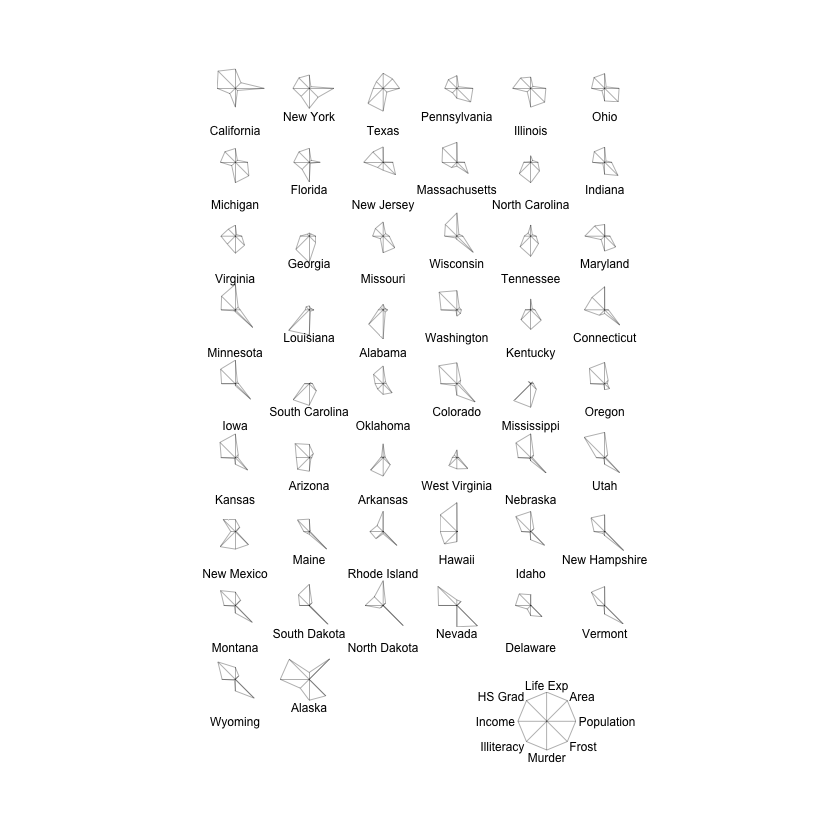

In [27]:
cols <- c("blue1", "chocolate1", "deepskyblue",
          "green", "thistle1", 
          "grey25", "lightsteelblue4", "salmon4")

vars <- c("Population", "Area",
          "Life Exp", "HS Grad", "Income",
          "Illiteracy", "Murder", "Frost")

# 将 state.x77 转换为数据框，便于列名索引
df <- as.data.frame(state.x77)

# 按人口降序排列，并提取指定变量
d <- df[order(-df[["Population"]]), vars]

# 绘制星图
par(bg = "white")
graphics::stars(d, draw.segments=FALSE,
      nrow=9, ncol=6,
      ylim=c(-1, 21),
      len=0.9,  cex=0.6,
      key.loc=c(12,1)
      )


## 脸谱图

effect of variables:
 modified item       Var         
 "height of face   " "Population"
 "width of face    " "Area"      
 "structure of face" "Life Exp"  
 "height of mouth  " "HS Grad"   
 "width of mouth   " "Income"    
 "smiling          " "Illiteracy"
 "height of eyes   " "Murder"    
 "width of eyes    " "Frost"     
 "height of hair   " "Population"
 "width of hair   "  "Area"      
 "style of hair   "  "Life Exp"  
 "height of nose  "  "HS Grad"   
 "width of nose   "  "Income"    
 "width of ear    "  "Illiteracy"
 "height of ear   "  "Murder"    


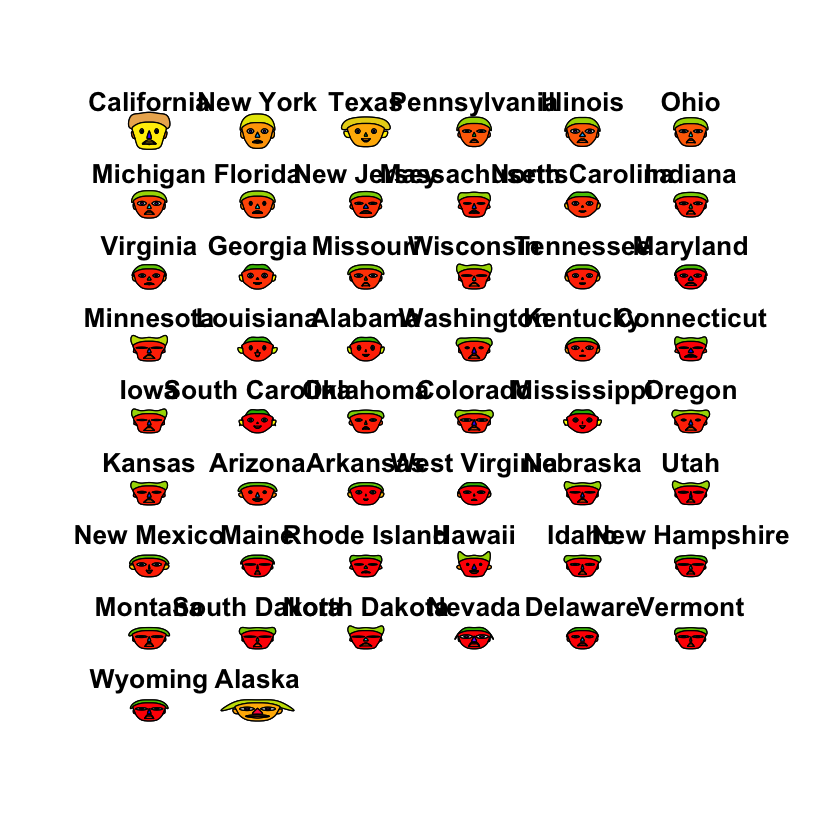

In [30]:
library(aplpack)
## 把州按人口数降序排列
d <- state.x77[order(-state.x77[,"Population"]),
               c("Population", "Area",
                 "Life Exp", "HS Grad", "Income",
                 "Illiteracy", "Murder",
                 "Frost"
                 )
               ]
par(bg = "white")
faces(d, nrow.plot=9, ncol.plot=6)

## Andrew曲线

## 平行坐标(parallel coordinates, parallel axes)图

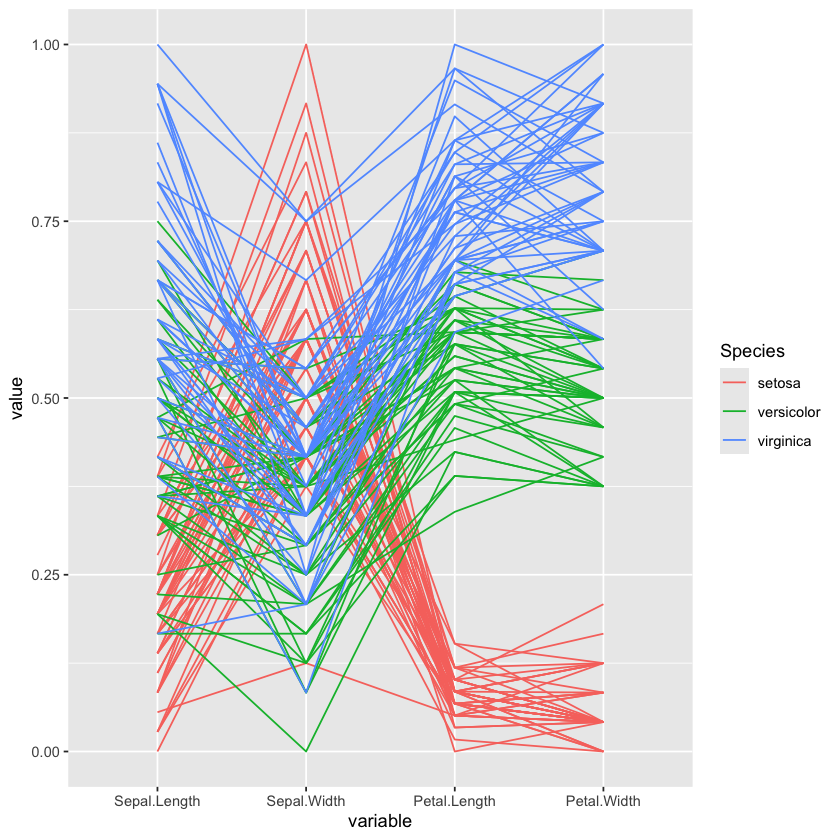

In [31]:
data(iris)
library(GGally)
ggparcoord(
  data = iris,
  columns=1:4,
  scale = "uniminmax",
  groupColumn="Species")

## 矩阵数据的图形

In [2]:
dv <- as.data.frame(var(iris[,1:4]))
knitr::kable(dv, digits=2)



|             | Sepal.Length| Sepal.Width| Petal.Length| Petal.Width|
|:------------|------------:|-----------:|------------:|-----------:|
|Sepal.Length |         0.69|       -0.04|         1.27|        0.52|
|Sepal.Width  |        -0.04|        0.19|        -0.33|       -0.12|
|Petal.Length |         1.27|       -0.33|         3.12|        1.30|
|Petal.Width  |         0.52|       -0.12|         1.30|        0.58|

In [3]:
# 构造一个对称正定矩阵
A <- matrix(c(4, 2, 2,
              2, 5, 1,
              2, 1, 3), nrow = 3, byrow = TRUE)

# 检查是否对称
isSymmetric(A)  # 应该返回 TRUE

# 进行 Cholesky 分解
L <- chol(A)

# 注意：R 的 chol() 返回的是上三角矩阵 R，使得 A = R'R
print(L)

# 验证分解是否正确
A_reconstructed <- t(L) %*% L
print(A_reconstructed)


[1] TRUE

     [,1] [,2]     [,3]
[1,]    2    1 1.000000
[2,]    0    2 0.000000
[3,]    0    0 1.414214
     [,1] [,2] [,3]
[1,]    4    2    2
[2,]    2    5    1
[3,]    2    1    3
